In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import sparse,  io, linalg
import pickle
from tqdm import tqdm_notebook as tqdm
import networkx as nx
import snap
from utils import *
import utils
%load_ext autoreload
%autoreload 2




In [2]:
data = np.loadtxt('../radoslaw_email/radoslaw.txt',dtype=int,comments='%')
# converting edge weight information into graph
G = nx.Graph()
for i in tqdm(range(data.shape[0])):
    if G.has_edge(data[i,0],data[i,1]):
        G[data[i,0]][data[i,1]]['weight']+=data[i,2]
    else:
        G.add_edge(data[i,0],data[i,1],weight=data[i,2])
for e in G.edges_iter():
    G[e[0]][e[1]]['weight_inv']=1/float(G[e[0]][e[1]]['weight'])
    G[e[0]][e[1]]['weight_inv_exp']=np.exp(-float(G[e[0]][e[1]]['weight'])/3.0)

        

<IPython.core.display.Javascript object>


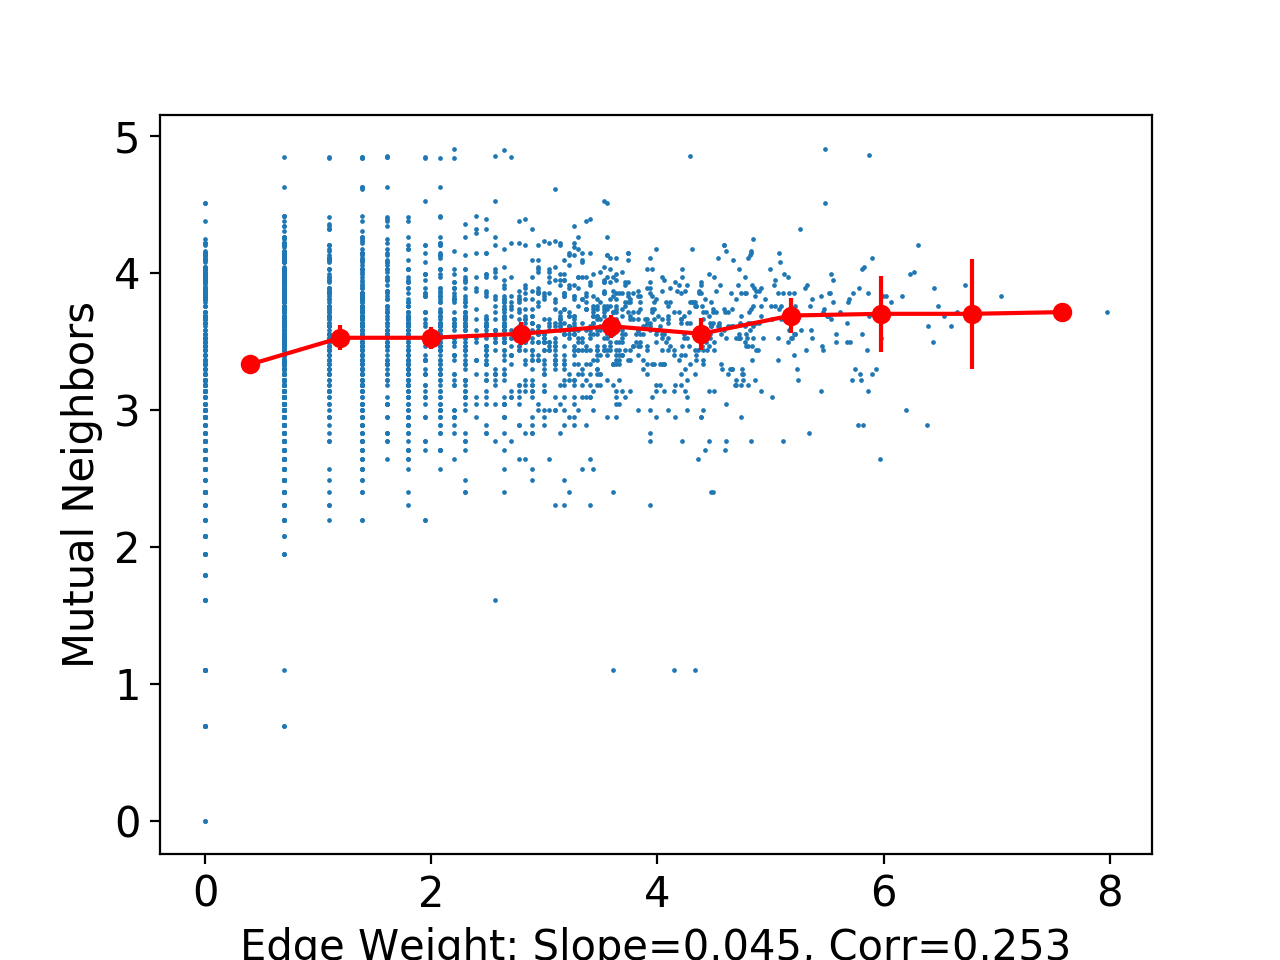

In [4]:
pwl=mutual(G)
#plot_log_log(pwl)
plot_log_log_summary(pwl,"Edge Weight", "Mutual Neighbors", B=10,summary=np.median)

<IPython.core.display.Javascript object>


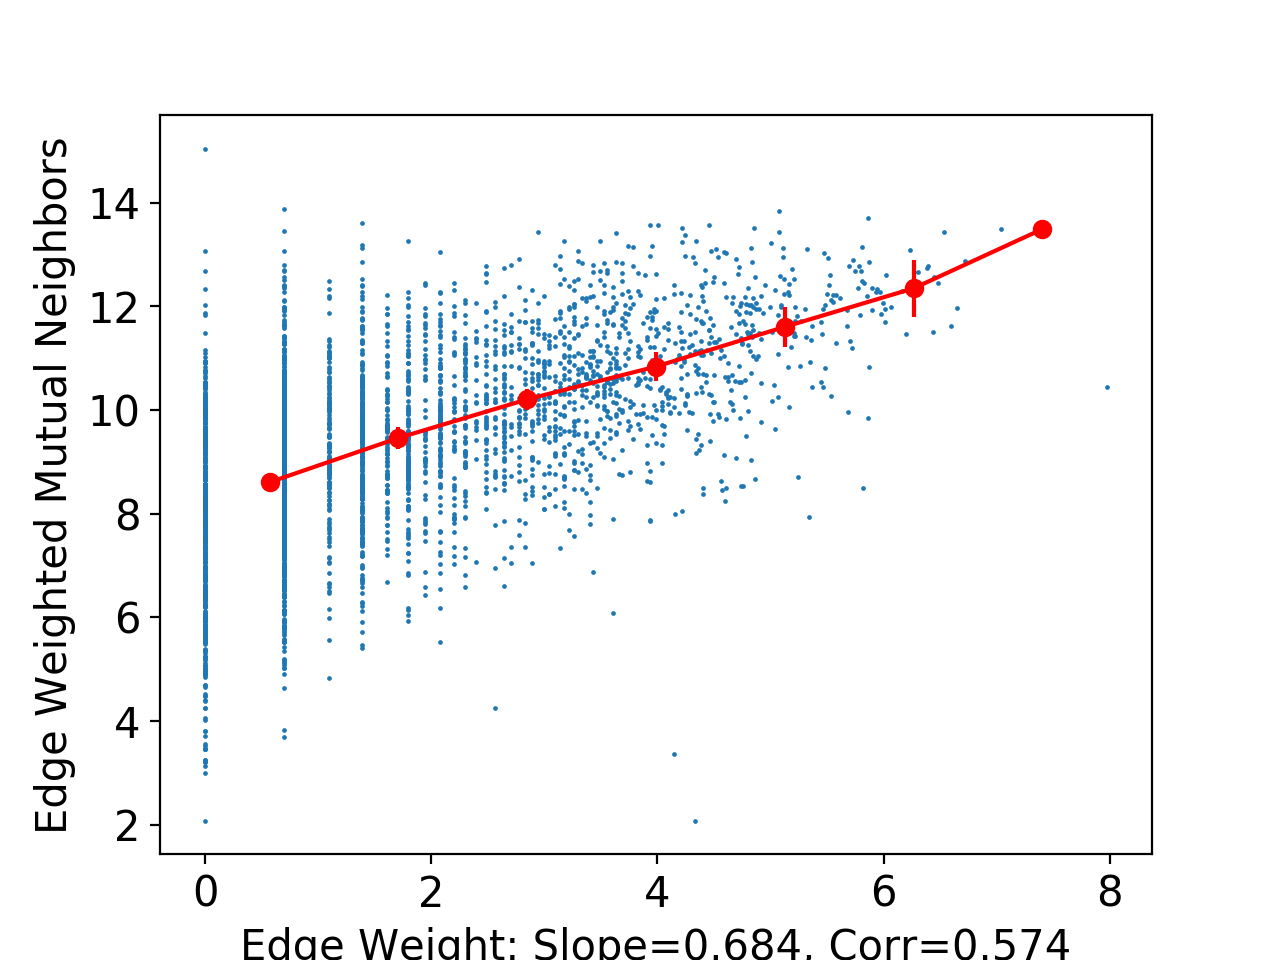

In [5]:
#pwl=sim_score_1(G)
pwl=mutual_ew(G)
#plot_log_log(pwl)
plot_log_log_summary(pwl,"Edge Weight", "Edge Weighted Mutual Neighbors", B=7,summary=np.median)

<IPython.core.display.Javascript object>


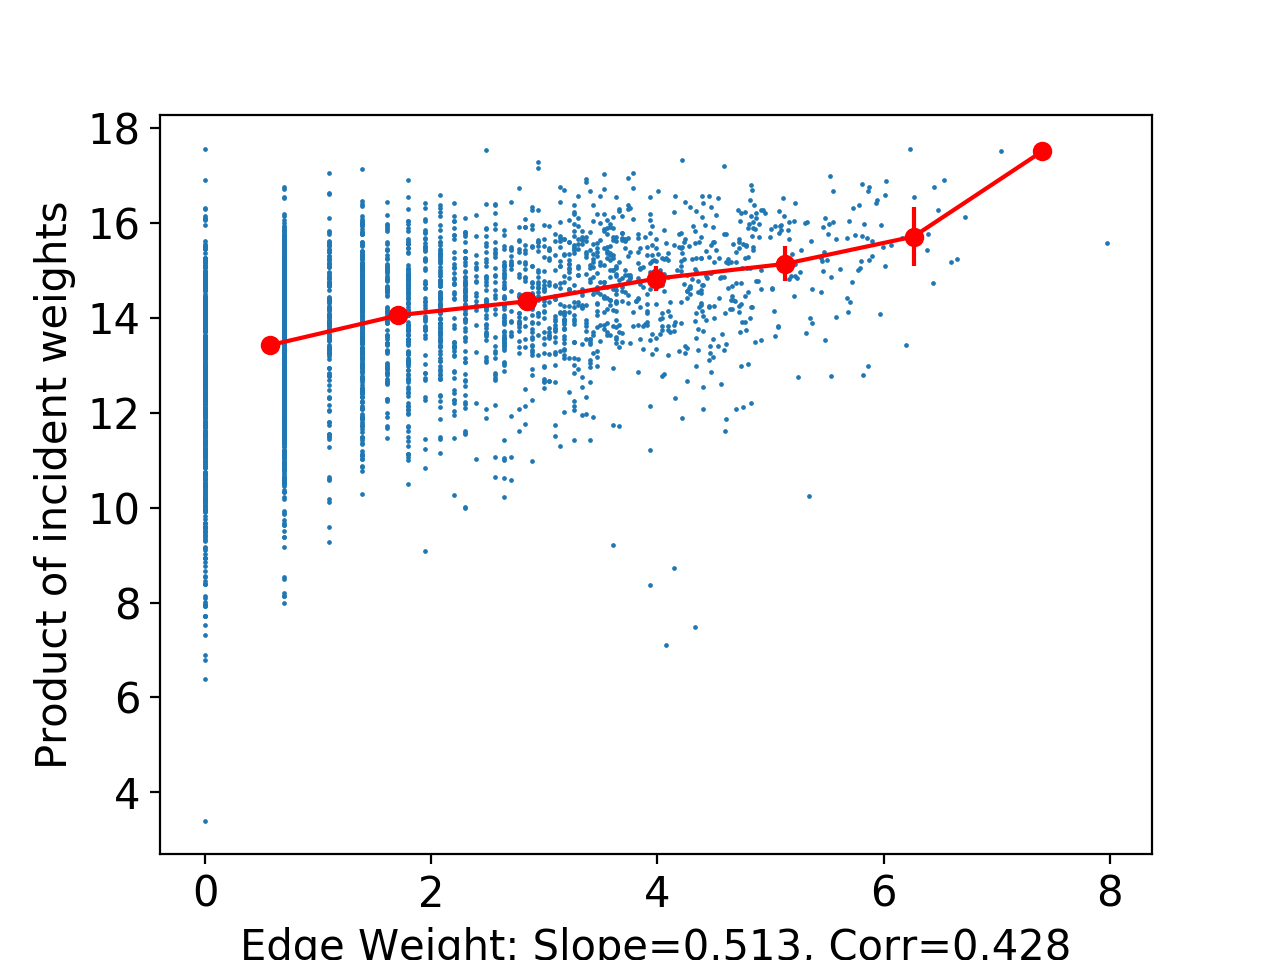

In [6]:
pwl=ewpl(G)
#plot_log_log(pwl)
plot_log_log_summary(pwl,"Edge Weight", "Product of incident weights", summary=np.median,B=7)

<IPython.core.display.Javascript object>


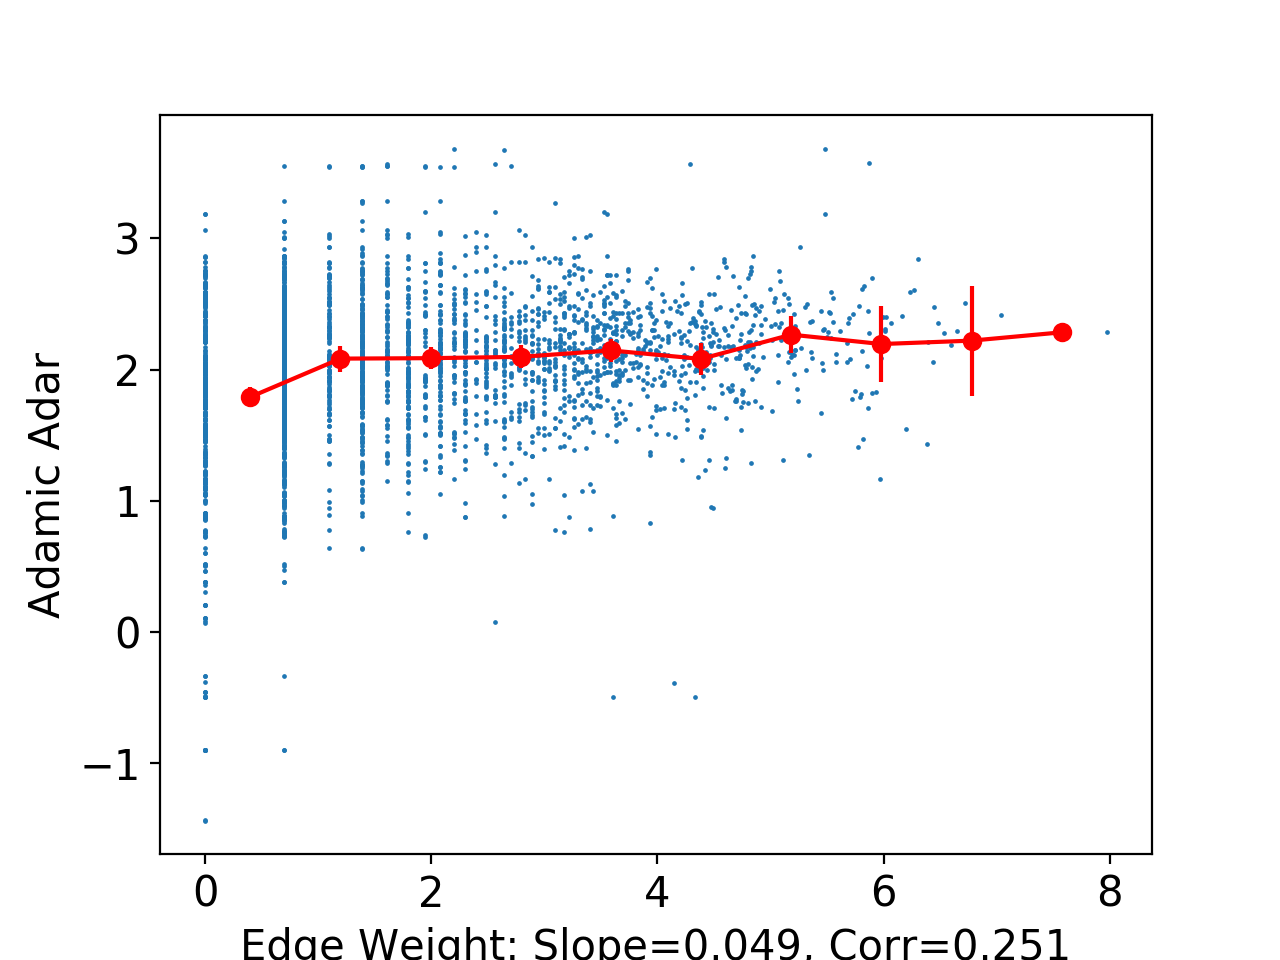

In [11]:
pwl=adamic_acar(G)
plot_log_log_summary(pwl,"Edge Weight", "Adamic Adar", B=10,summary=np.mean)


<IPython.core.display.Javascript object>


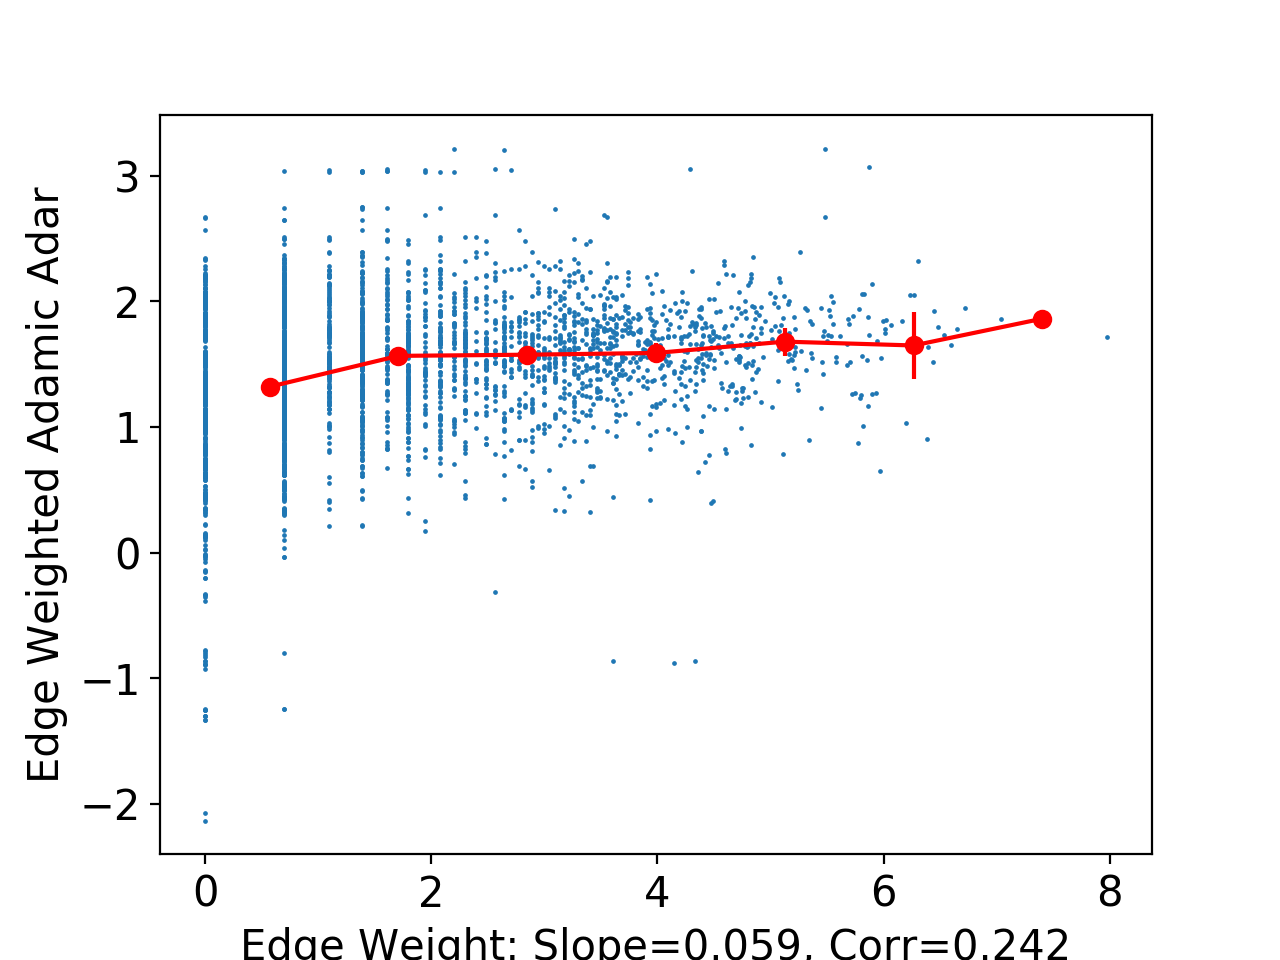

In [12]:
pwl=adamic_acar_ew(G)
plot_log_log_summary(pwl,"Edge Weight", "Edge Weighted Adamic Adar", B=7,summary=np.mean)

<IPython.core.display.Javascript object>


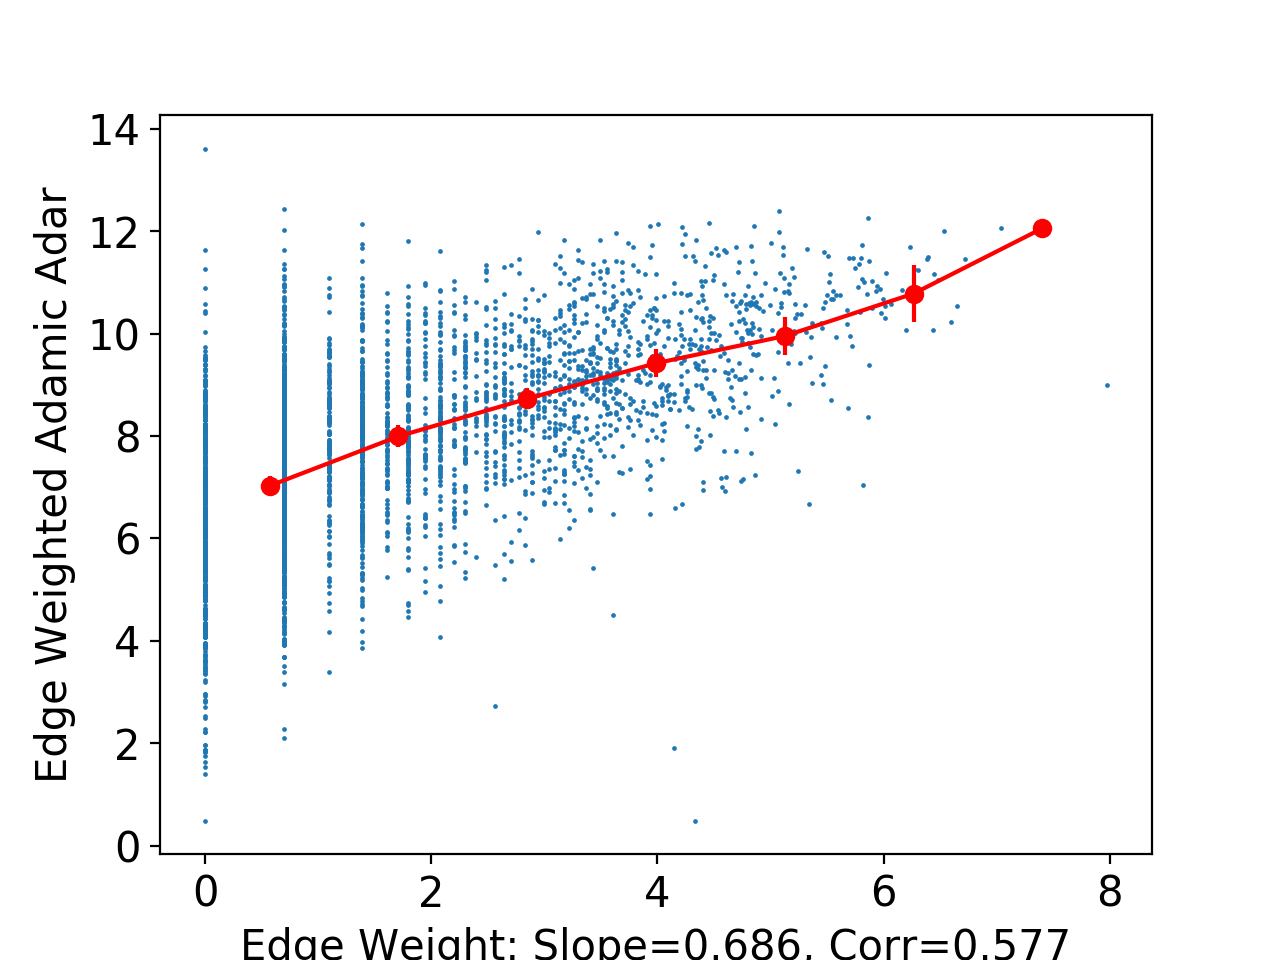

In [13]:
pwl=adamic_acar_ew_2(G)
plot_log_log_summary(pwl,"Edge Weight", "Edge Weighted Adamic Adar", B=7,summary=np.mean)

<IPython.core.display.Javascript object>


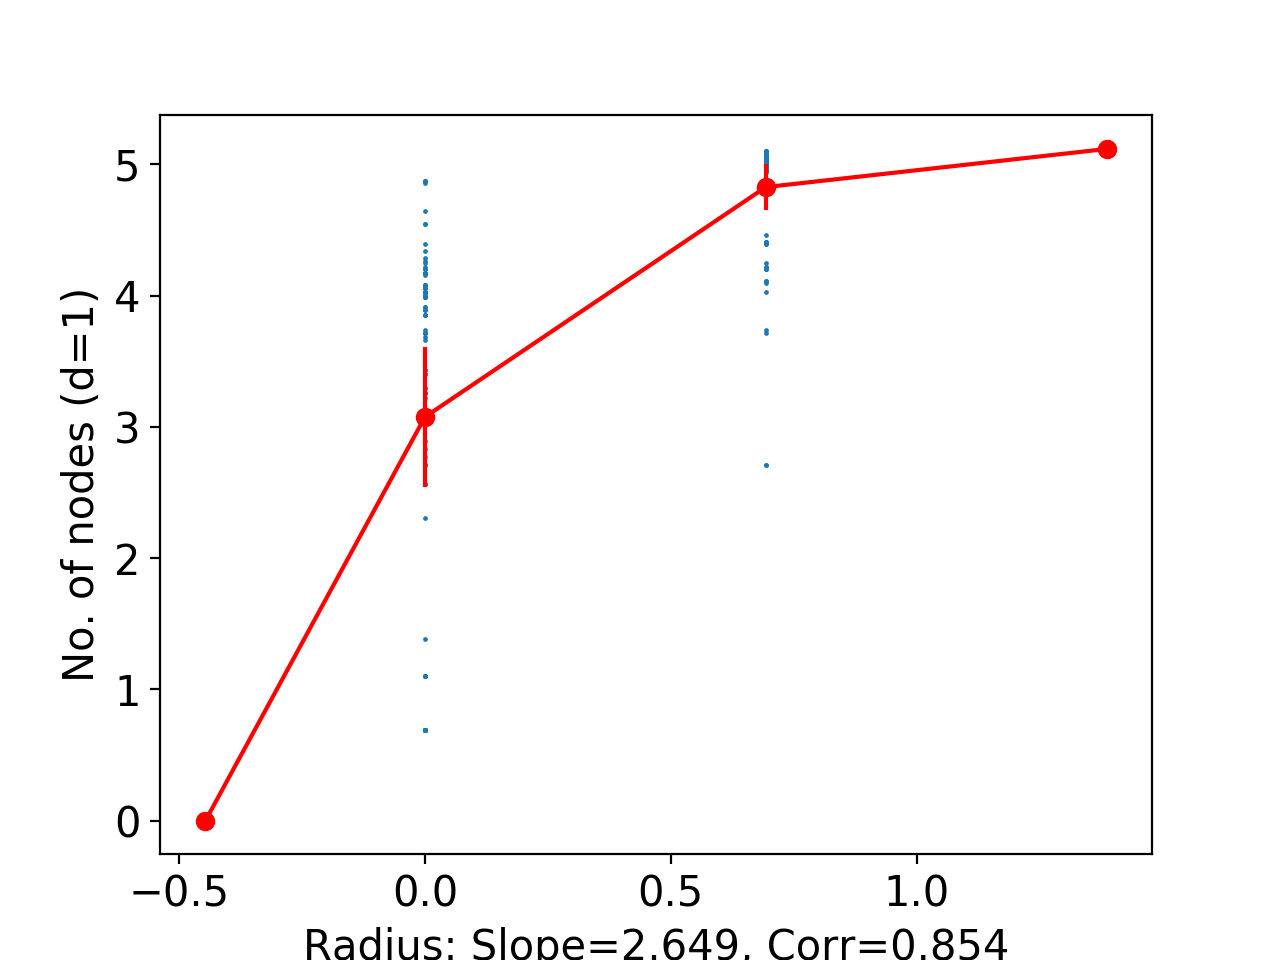

In [14]:
distances=[0.64,1.0,2.0,4.0]
pwl = self_similarity(G,distances,size=100)
plot_log_log_summary(np.asarray(pwl),"Radius", "No. of nodes (d=1)",discrete=True,summary=np.mean)

<IPython.core.display.Javascript object>


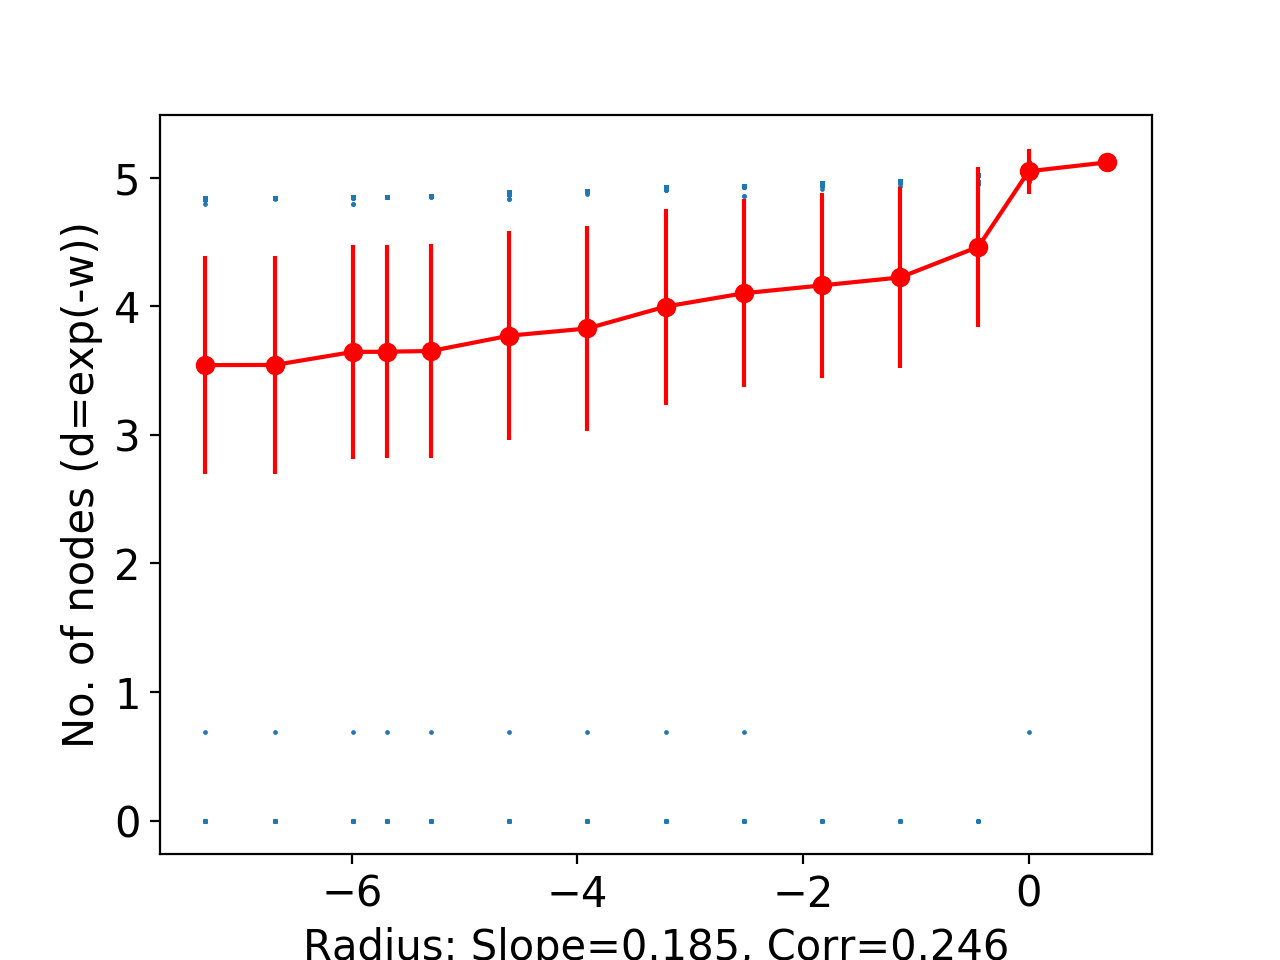

In [15]:
distances=[0.003375,0.000675,0.00125,0.0025,0.005,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.0,2.0]
pwl = self_similarity(G,distances,size=100,weight='weight_inv_exp')
plot_log_log_summary(np.asarray(pwl),"Radius", "No. of nodes (d=exp(-w))",discrete=True,summary=np.mean)

<IPython.core.display.Javascript object>


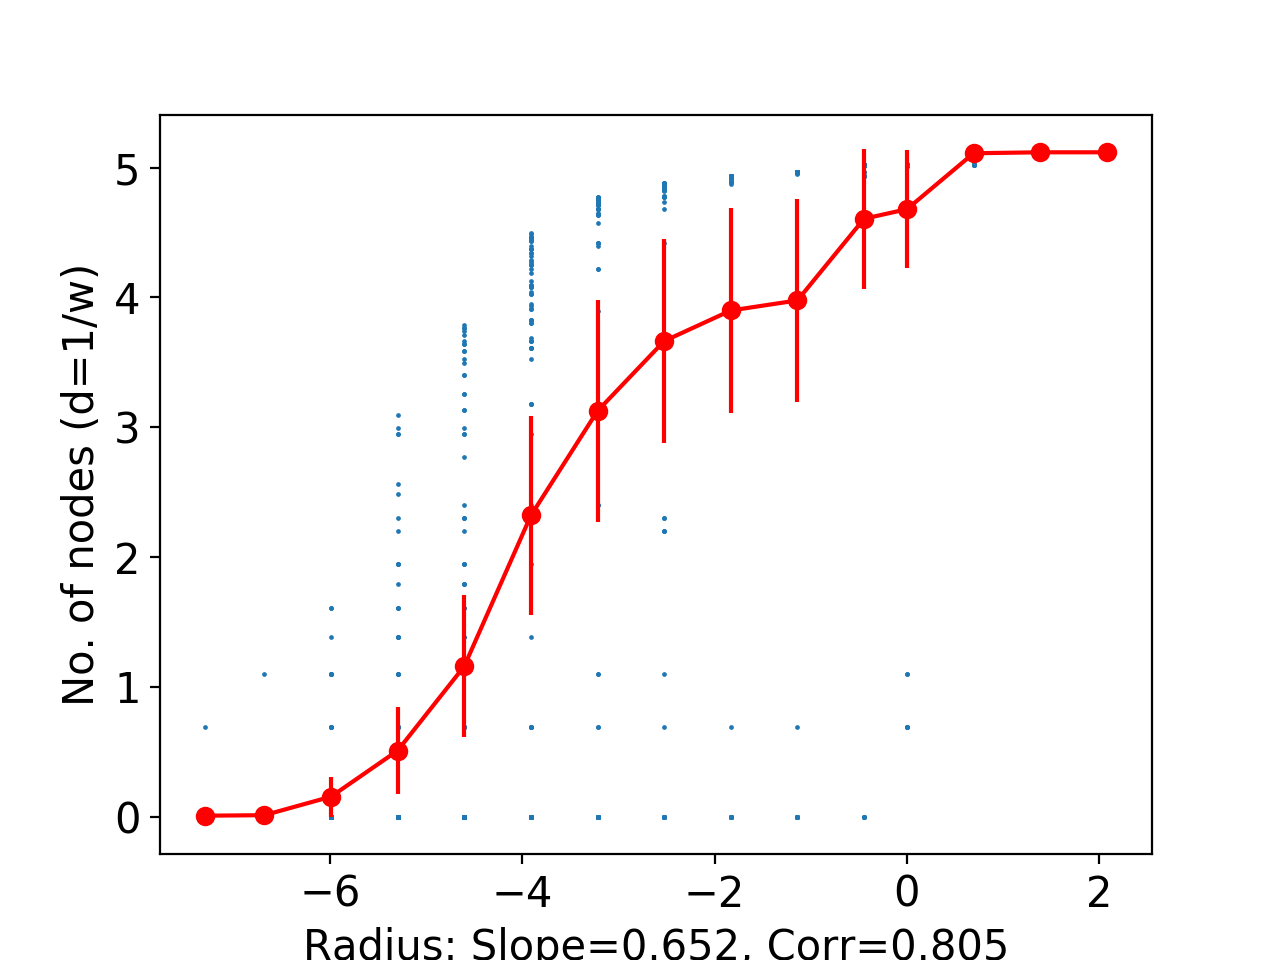

In [16]:
distances=[0.000675,0.00125,0.0025,0.005,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.0,2.0,4.0,8.0]
pwl = self_similarity(G,distances,size=100,weight='weight_inv')
plot_log_log_summary(np.asarray(pwl),"Radius", "No. of nodes (d=1/w)",discrete=True,summary=np.mean)